In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

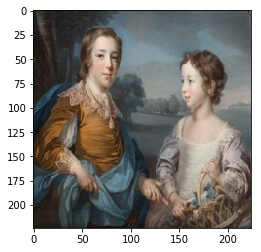

In [2]:
save_model_path = './logs/1557744378/model'

img = cv2.imdecode(np.fromfile(r"./TestPic/350_/350_.png",dtype=np.uint8),-1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.show()

In [3]:
sess = tf.Session()    
saver = tf.train.import_meta_graph(save_model_path+"/TransferModel.meta")
saver.restore(sess,tf.train.latest_checkpoint(save_model_path))
prediction = tf.get_collection('pred_network')[0]
graph = tf.get_default_graph()
x = graph.get_tensor_by_name("input_x:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
logits  = graph.get_tensor_by_name("logits:0")
prediction = tf.argmax(logits,1)

INFO:tensorflow:Restoring parameters from ./logs/1557744378/model\TransferModel


In [5]:
label = sess.run(prediction,feed_dict={x:[img],keep_prob:1})
print(label[0])

264
